## Data Downloading & Extraction

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saadahmad127","key":"5d229b238808113c0cddf9a67ceddbdd"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d kaustubhb999/tomatoleaf -p /content

100% 178M/179M [00:09<00:00, 22.0MB/s]
100% 179M/179M [00:09<00:00, 19.1MB/s]


In [7]:
!mkdir '/content/data'

In [8]:
! unzip '/content/tomatoleaf.zip' -d '/content/data'

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: /content/data/tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: /content/data/tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: /content/data/tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: /content/data/tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: /content/data/tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: /content/data/tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: /content/data/tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b

## Processing

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output as cls
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import torchvision
from torchvision import transforms, datasets

In [10]:
transformer = torchvision.transforms.Compose([
    # transforms.Resize(size=(255, 255)), 
    transforms.ToTensor()
])

In [11]:
train_dir = "/content/data/tomato/train/"
val_dir = "/content/data/tomato/val/"

In [12]:


datafolder_train = datasets.ImageFolder(root=train_dir, transform=transformer)
datafolder_test = datasets.ImageFolder(root=val_dir, transform=transformer)

train_set_size, test_set_size = len(datafolder_train), len(datafolder_test)
print('Train size:', train_set_size, '\nTest size:', test_set_size)

Train size: 10000 
Test size: 1000


Image shape: torch.Size([3, 256, 256])
Num of classes: 10


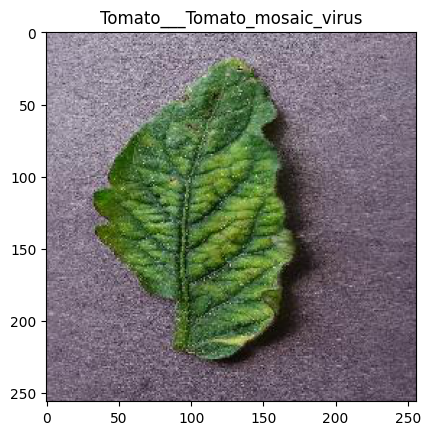

In [13]:
classes = datafolder_train.classes

img, label = datafolder_train[8200]
img_sample = img.permute(1, 2, 0) 

print('Image shape:', img.shape)
print('Num of classes:', len(classes))
plt.imshow(img_sample)
plt.title(classes[label]);

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.morphology import area_opening
from skimage.exposure import histogram
from skimage.filters import threshold_otsu

# Features etc.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.morphology import area_opening
from skimage.exposure import histogram
from skimage.filters import threshold_otsu

In [16]:
from skimage import exposure
from skimage.filters import gaussian
from skimage.filters import threshold_local

In [17]:
from skimage.filters import rank
from skimage.morphology import disk


In [18]:
footprint = disk(150)
footprint.shape

(301, 301)

In [19]:
eq=exposure.equalize_hist(np.array(img_sample)) #Histogram Equalization
local=rank.equalize(np.array(rgb2gray(img_sample)), footprint=footprint) #Local Histogram Equalization


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)
<ipython-input-19-5f1476b0b2e8>:2: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  local=rank.equalize(np.array(rgb2gray(img_sample)), footprint=footprint) #Local Histogram Equalization


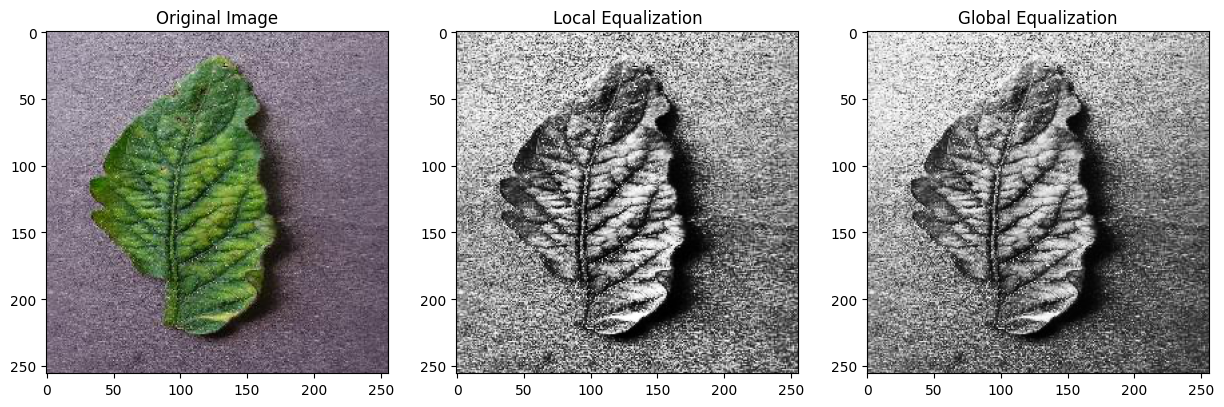

In [20]:
fig, axis = plt.subplots(1,3, figsize=(15,8))
axis[2].imshow(rgb2gray(eq),cmap='gray')
axis[2].title.set_text('Global Equalization')

axis[1].imshow(local,cmap='gray')
axis[1].title.set_text('Local Equalization')

axis[0].imshow(img_sample)
axis[0].title.set_text('Original Image')

plt.show()

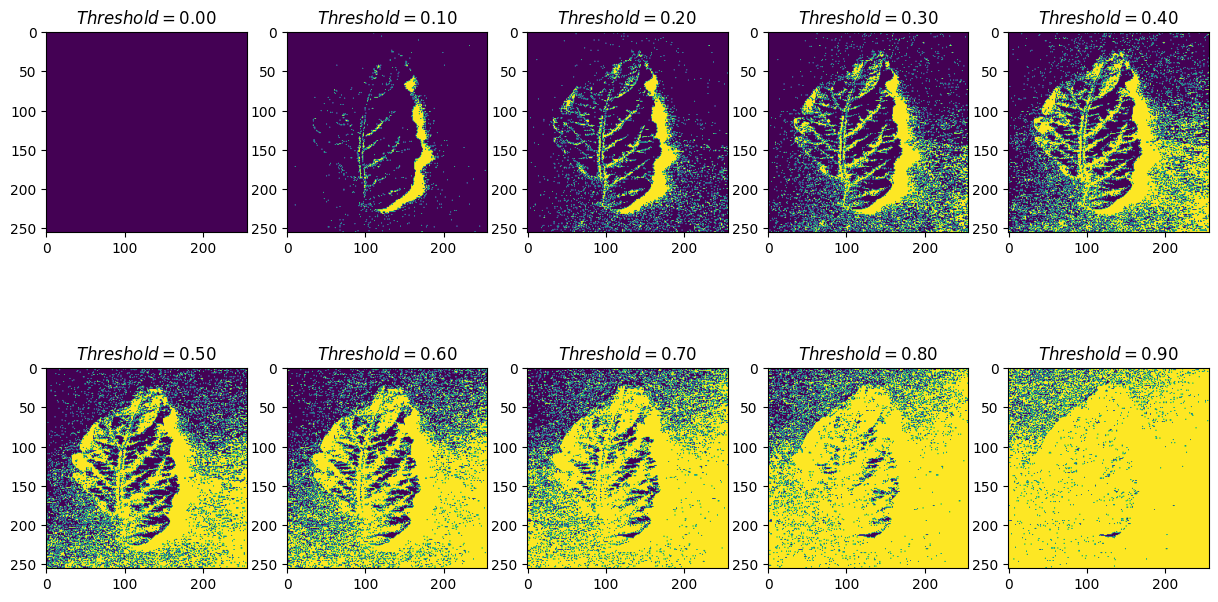

In [21]:
th_values = np.linspace(0, 1, 11)
fig, axis = plt.subplots(2, 5, figsize=(15,8))
chico_gray = rgb2gray(eq)

for th, ax in zip(th_values, axis.flatten()):
    
    chico_binarized = chico_gray < th
    ax.imshow(chico_binarized)
    ax.set_title('$Threshold = %.2f$' % th)

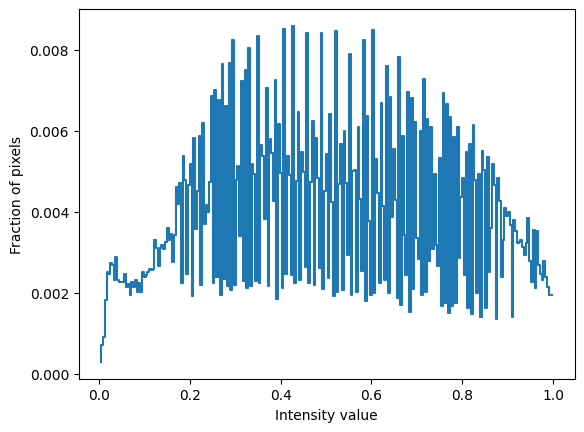

In [22]:
freq, bins = histogram(chico_gray)
plt.step(bins, freq*1.0/freq.sum())
plt.xlabel('Intensity value')
plt.ylabel('Fraction of pixels');

In [23]:
eq.dtype

dtype('float32')

In [24]:
import cv2 as cv

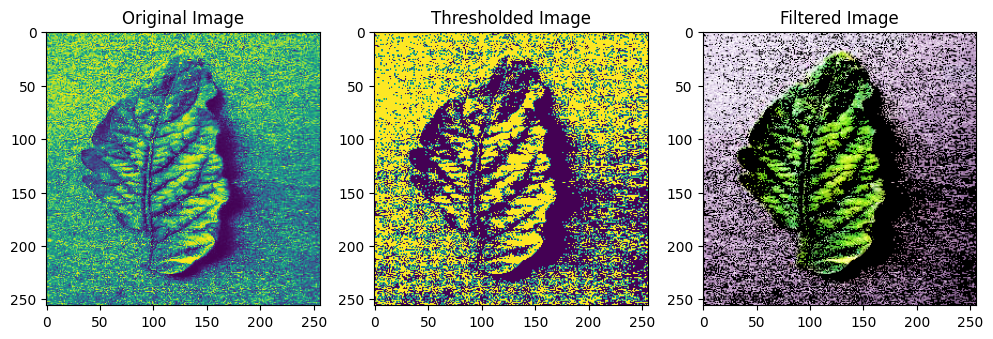

In [25]:
def masked_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])
fig, ax = plt.subplots(1, 3, figsize=(12,6))
thresh = threshold_otsu(local)
chico_otsu  = local > thresh
# thresh = threshold_otsu(chico_otsu)
# chico_otsu  = chico_gray >thresh

ax[0].imshow(local)
ax[0].title.set_text('Original Image')

ax[1].imshow(chico_otsu)
ax[1].title.set_text('Thresholded Image')

filtered = masked_image(eq, chico_otsu)

ax[2].imshow(filtered)
ax[2].title.set_text('Filtered Image')


In [ ]:
# from skimage.feature import SIFT, match_descriptors


In [ ]:
# detector_extractor = SIFT()


In [ ]:
# detector_extractor.detect_and_extract(chico_otsu)

In [ ]:
# detector_extractor.descriptors.shape

(1335, 128)

In [26]:
from skimage.feature import hog
fd, hog_image = hog(img_sample, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)

<ipython-input-26-e4ccf27ac45c>:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img_sample, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)


In [27]:
fd.shape

(34596,)

In [46]:
import numpy as np
import torch
import torchvision.transforms as transforms
from skimage.feature import hog

def calculate_hog(image):
    # convert image tensor to numpy array
    image_np = np.transpose(image.numpy(), (1, 2, 0))
    # calculate HOG features
    fd, hog_image = hog(image_np, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
    # convert HOG features to tensor
    hog_features = torch.from_numpy(fd).float()
    return hog_features

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: calculate_hog(x))
])

In [29]:
!ls '/content/data/tomato/train'

 Tomato___Bacterial_spot   Tomato___Septoria_leaf_spot
 Tomato___Early_blight	  'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___healthy	   Tomato___Target_Spot
 Tomato___Late_blight	   Tomato___Tomato_mosaic_virus
 Tomato___Leaf_Mold	   Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [30]:
!mkdir '/content/new_data'

In [31]:
!mkdir '/content/new_data_val'

In [32]:
! cp -R '/content/data/tomato/train/Tomato___healthy' '/content/new_data/'
! cp -R '/content/data/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus' '/content/new_data/'
! cp -R '/content/data/tomato/train/Tomato___Tomato_mosaic_virus' '/content/new_data/'


In [33]:
!ls '/content/new_data/'

Tomato___healthy	      Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus


In [34]:
! cp -R '/content/data/tomato/val/Tomato___healthy' '/content/new_data_val/'
! cp -R '/content/data/tomato/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus' '/content/new_data_val/'
! cp -R '/content/data/tomato/val/Tomato___Tomato_mosaic_virus' '/content/new_data_val/'


In [35]:
train_dir='/content/new_data'
val_dir='/content/new_data_val'

In [36]:

datafolder_train = datasets.ImageFolder(root=train_dir, transform=transform)
datafolder_test = datasets.ImageFolder(root=val_dir, transform=transform)

train_set_size, test_set_size = len(datafolder_train), len(datafolder_test)
print('Train size:', train_set_size, '\nTest size:', test_set_size)

Train size: 3000 
Test size: 300


In [37]:
labels=datafolder_train.class_to_idx

In [38]:
batch_size = 64


In [39]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(force_alpha=True)

In [40]:
datafolder_train

Dataset ImageFolder
    Number of datapoints: 3000
    Root location: /content/new_data
    StandardTransform
Transform: Compose(
               ToTensor()
               Lambda()
           )

In [41]:
from torch.utils import data as data_utils


In [42]:

data_loader = data_utils.DataLoader(datafolder_train,num_workers=32, batch_size=16, shuffle=True)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [43]:
labels_val=[]
for i in labels.keys():
  labels_val.append(labels[i])


In [44]:
labels_val

[0, 1, 2]

In [45]:
features=[]
labels=[]
for train,lb in data_loader:
  # batch=[]
  for i,j in zip(train,lb):

    features.append(i)
    labels.append(j)



<ipython-input-28-06a49eb054d5>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image_np, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
<ipython-input-28-06a49eb054d5>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image_np, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
<ipython-input-28-06a49eb054d5>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image_np, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
<ipython-input-28-06a49eb054d5>:10: FutureWarning: `multichannel` is a depre

In [47]:
features[0].shape

torch.Size([34596])

In [48]:
print(np.array(features).shape)
print(np.array(labels).shape)

(3000,)
(3000,)


<ipython-input-48-02130f91dd7a>:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  print(np.array(features).shape)
<ipython-input-48-02130f91dd7a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(features).shape)


In [49]:
ft = [t.numpy() for t in features]

In [50]:
print(np.array(ft).shape)


(3000, 34596)


In [51]:
ft_np = np.array(ft)


In [55]:
np.save('image_features.npy', ft_np)

# Load the array from the file
loaded_array = np.load('image_features.npy')

# Print the loaded array
print(loaded_array.shape)

(3000, 34596)


In [70]:
!ls -lh image_features.npy


-rw-r--r-- 1 root root 396M Jun 10 07:22 image_features.npy


In [58]:
train_df = pd.DataFrame(ft_np)

In [65]:
labels_lst = [i.item() for i in labels]
print(labels_lst[:5])

[0, 2, 1, 2, 2]


In [71]:
labels_np = np.array(labels_lst)
np.save('labels.npy', labels_np)

# Load the array from the file
labels_np = np.load('labels.npy')

# Print the loaded array
print("Labels Shape: ",labels_np.shape)

Labels Shape:  (3000,)


In [74]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [79]:
! mkdir 'gdrive/MyDrive/DIP_Data'

In [83]:
!ls 'gdrive/MyDrive/DIP_Data'

HOGFeatures.npy  labels.npy


In [82]:
np.save('gdrive/MyDrive/DIP_Data/labels.npy', labels_np)
np.save('gdrive/MyDrive/DIP_Data/HOGFeatures.npy', ft_np)


In [66]:
train_df['label']=labels_lst


In [68]:
train_df.to_csv('LeafFeaturesHOG.csv',index=False)

In [69]:
!ls -lh /content/LeafFeaturesHOG.csv


-rw-r--r-- 1 root root 1.1G Jun 10 07:33 /content/LeafFeaturesHOG.csv


In [84]:
from sklearn.model_selection import train_test_split
# Split the data and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ft, labels, test_size=0.2, random_state=42)

from sklearn.svm import SVC

# Initialize the SVM classifier
clf = SVC(kernel='linear', probability=True, random_state=42)



# Train the classifier on the training data and labels
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

In [89]:
print("Accuracy: {:.2f}%".format(accuracy * 100))



Accuracy: 92.00%


In [98]:
y_pred = clf.predict(X_test)


In [100]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[193,  10,   7],
       [  6, 179,   7],
       [  1,  17, 180]])

In [106]:
from sklearn.metrics import f1_score
y_true=y_test

print(f1_score(y_true, y_pred, average='macro'))


0.9197760830033692


In [ ]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [87]:
import pickle

In [88]:
pickle.dump(clf, open('/content/gdrive/MyDrive/DIP_Data/model92.pkl', 'wb'))